### The Only Free Lunch in Finance
- The combination of two or more assets that are decorrelated can decrease the volatility in the extended level.

##### 2 - Assets Combinations
- Risk-Return Space or Mean-Variance Framework
    - on `x-axis`: Risk/Variance
    - on `y-axis`: Return of that asset
- What is the return and volatility of a combination of A and B?
    - A portfolio that is 100% in A and 0% in B?
        - the same as the Risk and Return of A
    - A portfolio that is 100% in B and 0% in A?
        - the same as the RIsk and Return of B?
    - 50% in A and 50% in B
        - Return:
            - The weighted mean of all the components of the portfolio.
        - Risk
            - Cannot be answered with just the return and volatility value of each asset.
            - Actually depending on the correlation between A And B.
            - If two assets are not correlated, i.e., A goes up, while B goes down and so on -> volatility will be less than just the weighted average of the volatility of two assets.
            - The more decorrelated they are, the less the volatility of that portfolio.

### Return
$$ R(w_A, w_B) = W_A \times R_A + W_B \times R_B $$

### Volatility
$$ {\sigma}^2(w_A, w_B) = \sigma_A^2 w_A^2 + \sigma_B^2 w_B^2 + 2w_Aw_B\sigma_A\sigma_B\rho_{A, B} $$

- Where $ \rho_{A, B} $ is the correlation between asset A and B.

### The Efficient Frontier
How to compute the efficient frontier when we have a set of expected returns, volatilities (or variance) and correlations (or covariance). It is a fair question as to how we can get these numbers for the future, but for now, we assume that historic returns are a reasonable assumption.

In [2]:
import pandas as pd
ind = pd.read_csv("data/ind30_m_vw_rets.csv", header=0, index_col=0, parse_dates=True)/100
ind.index = pd.to_datetime(ind.index, format="%Y%m").to_period('M')

/tmp/ipykernel_39350/205007867.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ind = pd.read_csv("data/ind30_m_vw_rets.csv", header=0, index_col=0, parse_dates=True)/100


In [7]:
ind.head()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400


In [8]:
ind.columns

Index(['Food ', 'Beer ', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth ',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal ', 'Oil  ', 'Util ', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin  ', 'Other'],
      dtype='object')

In [14]:
# since the column names have embedded spaces, we can strip out the leading and trailing spaces
# in the Series by using the .str.strip() method.
ind.columns = ind.columns.str.strip();
ind.columns

Index(['Food', 'Beer', 'Smoke', 'Games', 'Books', 'Hshld', 'Clths', 'Hlth',
       'Chems', 'Txtls', 'Cnstr', 'Steel', 'FabPr', 'ElcEq', 'Autos', 'Carry',
       'Mines', 'Coal', 'Oil', 'Util', 'Telcm', 'Servs', 'BusEq', 'Paper',
       'Trans', 'Whlsl', 'Rtail', 'Meals', 'Fin', 'Other'],
      dtype='object')

In [15]:
ind.shape
# 1110 rows and 30 columns

(1110, 30)

In [ ]:
def get_ind_returns():
    """
    Load and format the Ken French 30 Industry Portfolios Value Weighted Monthly Returns
    """
    ind = pd.read_csv("data/ind30_m_vw_rets.csv", header=0, index_col=0, parse_dates=True)/100
    ind.index = pd.to_datetime(ind.index, format="%Y%m").to_period('M')
    ind.columns = ind.columns.str.strip()
    return ind

In [65]:
import edhec_risk_kit as erk

%load_ext autoreload
%autoreload 2
%matplotlib inline

ind = erk.get_ind_returns()
ind.shape

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


(1110, 30)

<Axes: >

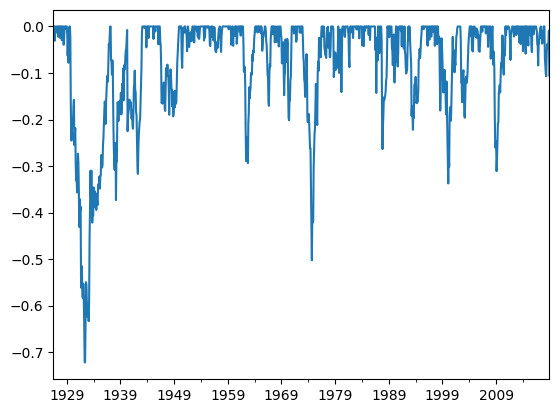

In [74]:
# check the drawdow of the Food industry
erk.drawdown(ind["Food"])["Drawdown"].plot.line()